In [108]:
# required imports for the function here
# some of these might be extraneous since they're just being grabbed from the total pipeline
# but right now, we just need to make some catalogs!
%matplotlib inline

import numpy as np
from numpy.lib.recfunctions import append_fields
import matplotlib
import matplotlib.pyplot as plt
import halotools.mock_observables as mo
import halotools.sim_manager as sm
import astropy.coordinates as coord
import scipy.stats as stats

In [64]:
fname = './l0250_d200b.catalog' # file name to z0.0.catalog
mthresh = 7e11  # threshold mass in Msun/h
gnewton = 4.302e-6
lbox = 250.0
vhost_min = 135.0
vrat_frac = 0.3
vsub_min = vhost_min * vrat_frac
nrand = 100

# define dict pointing to all marks of interest
rs_dict = {'halo_id':(0,'i8'), 'halo_mass':(2,'f8'), 'halo_vmax':(3,'f8'), 'halo_rvir':(5,'f8'),
           'halo_rs':(6,'f8'), 'halo_x':(8,'f8'), 'halo_y':(9,'f8'), 'halo_z':(10,'f8'),
           'halo_spin':(17,'f8'), 'halo_ctoa':(28, 'f8'), 'halo_pid':(41,'i8')}

reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_neq_dict={'halo_pid':-1})
hosts_data_matching_200 = reader.read_ascii()

fname = './l0250_d100b.catalog' # file name to z0.0.catalog
mthresh = 8e11  # threshold mass in Msun/h
reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_neq_dict={'halo_pid':-1})
hosts_data_matching_100 = reader.read_ascii()

fname = './l0250_d50b.catalog' # file name to z0.0.catalog
mthresh = 1.5e12  # threshold mass in Msun/h
reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_neq_dict={'halo_pid':-1})
hosts_data_matching_50 = reader.read_ascii()

fname = './l0250_d60b.catalog' # file name to z0.0.catalog
mthresh = 1e12  # threshold mass in Msun/h
reader = sm.TabularAsciiReader(fname, rs_dict, row_cut_min_dict={'halo_mass':mthresh},
                               row_cut_neq_dict={'halo_pid':-1})
hosts_data_master = reader.read_ascii()


...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d200b.catalog
 
Total number of rows in detected data = 2501871
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 19.92 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d100b.catalog
 
Total number of rows in detected data = 2610326
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 21.35 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d50b.catalog
 
Total number of rows in detected data = 2692442
Number of rows in detected header = 16 

... working on chunk 0 of 1
Total runtime to read in ASCII = 20.54 seconds



...Processing ASCII data of file: 
/data/asv13/projects/haloenviron-pipeline/l0250_d60b.catalog
 
Total number of rows in detected data = 2675191
Number of rows in detected header = 16 

... working 

In [65]:
c_master = coord.SkyCoord(x=hosts_data_master['halo_x'], y=hosts_data_master['halo_y'], z=hosts_data_master['halo_z'],
                         unit='Mpc', frame='icrs', representation='cartesian')

In [66]:
c_matching_200 = coord.SkyCoord(x=hosts_data_matching_200['halo_x'], y=hosts_data_matching_200['halo_y'], z=hosts_data_matching_200['halo_z'],
                            unit='Mpc', frame='icrs', representation='cartesian')
c_matching_100 = coord.SkyCoord(x=hosts_data_matching_100['halo_x'], y=hosts_data_matching_100['halo_y'], z=hosts_data_matching_100['halo_z'],
                            unit='Mpc', frame='icrs', representation='cartesian')
c_matching_50 = coord.SkyCoord(x=hosts_data_matching_50['halo_x'], y=hosts_data_matching_50['halo_y'], z=hosts_data_matching_50['halo_z'],
                            unit='Mpc', frame='icrs', representation='cartesian')

In [67]:
idx_200, sep2d_200, sep3d_200 = coord.match_coordinates_3d(c_matching_200, c_master)
idx_100, sep2d_100, sep3d_100 = coord.match_coordinates_3d(c_matching_100, c_master)
idx_50, sep2d_50, sep3d_50 = coord.match_coordinates_3d(c_matching_50, c_master)

In [68]:
np.percentile(sep3d_200,70)

0.0023644972349005393

In [69]:
mask_200 = (sep3d_200.value <= hosts_data_matching_200['halo_rvir']*.001*.1)
othermask_200 = idx_200[np.where(sep3d_200.value <= hosts_data_matching_200['halo_rvir']*.001*.1)]

mask_100 = (sep3d_100.value <= hosts_data_matching_100['halo_rvir']*.001*.1)
othermask_100 = idx_100[np.where(sep3d_100.value <= hosts_data_matching_100['halo_rvir']*.001*.1)]

mask_50 = (sep3d_50.value <= hosts_data_matching_50['halo_rvir']*.001*.1)
othermask_50 = idx_50[np.where(sep3d_50.value <= hosts_data_matching_50['halo_rvir']*.001*.1)]

In [70]:
print len(mask), np.sum(mask), float(np.sum(mask))/float(len(mask))

14696 11039 0.751156777354


In [71]:
matched_catalog_200 = hosts_data_matching_200[np.where(mask_200==True)]
matched_catalog_master_200 = hosts_data_master[othermask_200]

matched_catalog_100 = hosts_data_matching_100[np.where(mask_100==True)]
matched_catalog_master_100 = hosts_data_master[othermask_100]

matched_catalog_50 = hosts_data_matching_50[np.where(mask_50==True)]
matched_catalog_master_50 = hosts_data_master[othermask_50]

<Container object of 3 artists>

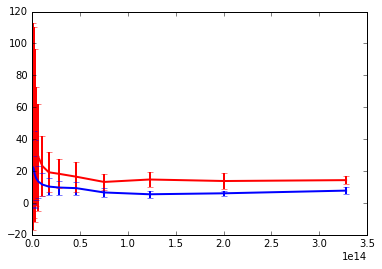

In [72]:
#plt.semilogx(matched_catalog['halo_mass'], matched_catalog['halo_spin'],
#         'b.')
#plt.semilogx(matched_catalog_master['halo_mass'], matched_catalog_master['halo_spin'],
#             'r.')
#plt.semilogx(matched_catalog['halo_mass'], matched_catalog_master['halo_spin'], 'r.')
#plt.ylim(0,500)

total_bins = 15

X1 = np.log10(matched_catalog_200['halo_mass'])
Y1 = matched_catalog_200['halo_rvir']/matched_catalog_200['halo_rs']
Y2 = matched_catalog_master_200['halo_rvir']/matched_catalog_master_200['halo_rs']


bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_median = [np.median(Y1[idx==k]) for k in range(total_bins)]

running_std    = [Y1[idx==k].std() for k in range(total_bins)]
scatter_200 = [running_std[k]/running_median[k] for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2),running_median,
              running_std, color='b', label=r'$\Delta=200$', lw=2)

bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_median = [np.median(Y2[idx==k]) for k in range(total_bins)]

running_std    = [Y2[idx==k].std() for k in range(total_bins)]
scatter_70 = [running_std[k]/running_median[k] for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2),running_median,
              running_std, color='r', label=r'$\Delta=70$', lw=2)

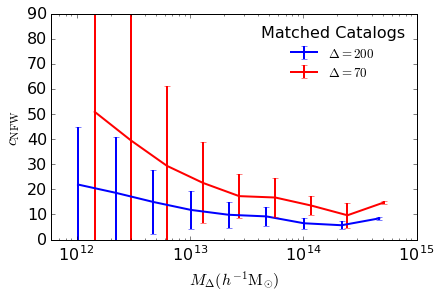

In [125]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rcParams['lines.linewidth'] = 3

total_bins = 10

X1 = np.log10(matched_catalog_200['halo_mass'])
Y1 = matched_catalog_200['halo_rvir']/matched_catalog_200['halo_rs']
X2 = np.log10(matched_catalog_master_200['halo_mass'])
Y2 = matched_catalog_master_200['halo_rvir']/matched_catalog_master_200['halo_rs']


bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_median = [np.median(Y1[idx==k]) for k in range(total_bins)]

running_std    = [Y1[idx==k].std() for k in range(total_bins)]
scatter_200 = [running_std[k]/running_median[k] for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2),running_median,
              running_std, color='b', label=r'$\Delta=200$', lw=2)

bins = np.linspace(X2.min(),X2.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X2,bins)
running_median = [np.median(Y2[idx==k]) for k in range(total_bins)]

running_std    = [Y2[idx==k].std() for k in range(total_bins)]
scatter_70 = [running_std[k]/running_median[k] for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2),running_median,
              running_std, color='r', label=r'$\Delta=70$', lw=2)

plt.xscale('log')
plt.xlim(6e11,1e15)
plt.ylim(0,90)
plt.legend(loc='upper right', numpoints=1, prop={'size': 13}, title='Matched Catalogs', frameon=False)
plt.xlabel(r'$M_{\Delta} (h^{-1}\mathrm{M}_{\odot})$')
plt.ylabel(r'$c_{\mathrm{NFW}}$')
plt.tight_layout(pad=0.1)
plt.savefig('./FIGS/matched_catalog_cnfwcomp.pdf')

In [74]:
data_200 = [0.5012, 0.4714, 0.4319, 0.3419, 0.3308, 0.3475, 0.3214, 0.3527, 0.1862]
data_70 = [0.4375, 0.4132, 0.3641, 0.3376, 0.3420, 0.3524, 0.3465, 0.4042, 0.0343]
print np.mean(data_200), np.std(data_200)
print np.mean(data_70), np.std(data_70)

0.365 0.0884296330423
0.336866666667 0.112119400641


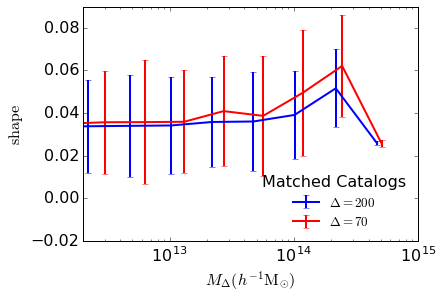

In [124]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rcParams['lines.linewidth'] = 3

total_bins = 10

X1 = np.log10(matched_catalog_200['halo_mass'])
Y1 = matched_catalog_200['halo_spin']
X2 = np.log10(matched_catalog_master_200['halo_mass'])
Y2 = matched_catalog_master_200['halo_spin']


bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_median = [np.median(Y1[idx==k]) for k in range(total_bins)]

running_std    = [Y1[idx==k].std() for k in range(total_bins)]
scatter_200 = [running_std[k]/running_median[k] for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2),running_median,
              running_std, color='b', label=r'$\Delta=200$', lw=2)

bins = np.linspace(X2.min(),X2.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X2,bins)
running_median = [np.median(Y2[idx==k]) for k in range(total_bins)]

running_std    = [Y2[idx==k].std() for k in range(total_bins)]
scatter_70 = [running_std[k]/running_median[k] for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2),running_median,
              running_std, color='r', label=r'$\Delta=70$', lw=2)

plt.xscale('log')
plt.xlim(2e12,1e15)
plt.ylim(-0.02,0.09)
plt.legend(loc='lower right', numpoints=1, prop={'size': 13}, title='Matched Catalogs', frameon=False)
plt.xlabel(r'$M_{\Delta} (h^{-1}\mathrm{M}_{\odot})$')
plt.ylabel(r'$\mathrm{shape}$')
plt.tight_layout(pad=0.1)
plt.savefig('./FIGS/matched_catalog_shapecomp.pdf')

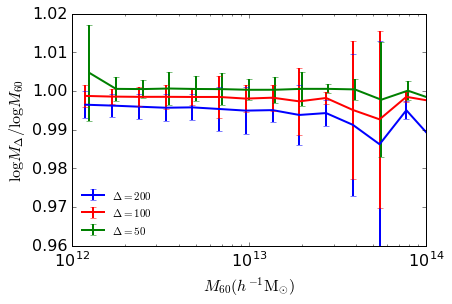

In [105]:
total_bins=20

X1 = np.log10(matched_catalog_master_200['halo_mass'])
Y1 = np.log10(matched_catalog_200['halo_mass'])/np.log10(matched_catalog_master_200['halo_mass'])

bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_mean = [np.mean(Y1[idx==k]) for k in range(total_bins)]
running_std    = [Y1[idx==k].std() for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2), running_mean,
              running_std, color='b', label=r'$\Delta=200$', lw=2)

X1 = np.log10(matched_catalog_master_100['halo_mass'])
Y1 = np.log10(matched_catalog_100['halo_mass'])/np.log10(matched_catalog_master_100['halo_mass'])

bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_mean = [np.mean(Y1[idx==k]) for k in range(total_bins)]
running_std    = [Y1[idx==k].std() for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2), running_mean,
              running_std, color='r', label=r'$\Delta=100$', lw=2)

X1 = np.log10(matched_catalog_master_50['halo_mass'])
Y1 = np.log10(matched_catalog_50['halo_mass'])/np.log10(matched_catalog_master_50['halo_mass'])

bins = np.linspace(X1.min(),X1.max(), total_bins)
delta = bins[1]-bins[0]
idx  = np.digitize(X1,bins)
running_mean = [np.mean(Y1[idx==k]) for k in range(total_bins)]
running_std    = [Y1[idx==k].std() for k in range(total_bins)]
plt.errorbar(10**(bins-delta/2), running_mean,
              running_std, color='g', label=r'$\Delta=50$', lw=2)
plt.xlabel(r'$M_{\mathrm{60}} (h^{-1}\mathrm{M}_{\odot})$')
plt.ylabel(r'$\log M_{\Delta} / \log M_{\mathrm{60}}$')
plt.xlim(10**12,10**14)
plt.ylim(0.96,1.02)
plt.legend(loc='lower left', numpoints=1, prop={'size': 11}, frameon=False)
plt.tight_layout(pad=0.01)
plt.savefig('./FIGS/massdeltacompare.pdf')
plt.xscale('log')

In [119]:
mass_sort = np.sort(hosts_data_matching_100, order='halo_mass')
mass_binned = stats.binned_statistic(np.log10(mass_sort['halo_mass']),
                                      np.log10(mass_sort['halo_mass']),
                                      statistic='mean', bins=20)

(array([  1.44900000e+04,   1.64000000e+02,   3.30000000e+01,
          5.00000000e+00,   3.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.00820418e+00,   1.14053981e+02,   2.27099757e+02,
          3.40145534e+02,   4.53191310e+02,   5.66237086e+02,
          6.79282863e+02,   7.92328639e+02,   9.05374416e+02,
          1.01842019e+03,   1.13146597e+03]),
 <a list of 10 Patch objects>)

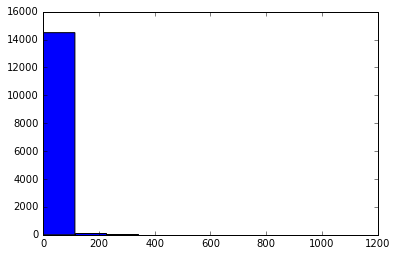

In [123]:
plt.hist(hosts_data_matching_200['halo_rvir']/hosts_data_matching_200['halo_rs'])